In [1]:
import glob

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plot(luc, non, threshold=20, hist=True):
    axlabel = 'Covariance (Log Scale)'
    sns.distplot(np.log10(luc), label='LUC', hist=hist, axlabel=axlabel, color='g')
    sns.distplot(np.log10(non), label='Non-LUC', hist=hist, axlabel=axlabel, color='b')
    plt.axvline(np.log10(threshold), color='k')
    plt.legend()
    plt.savefig('../figs/cov.pdf')

In [3]:
def fractions(luc, non, threshold=20):
    luc = float((luc <= threshold).sum()) / len(luc)
    non = float((non >= threshold).sum()) / len(non)
    return luc, non

In [4]:
def plotdh(dh, threshold=0.5, hist=True):
    axlabel = 'Relative Difference with History (Log Scale)'
    sns.distplot(np.log10(dh), hist=hist, axlabel=axlabel)
    plt.axvline(np.log10(0.5), color='k')
    plt.legend()
    plt.savefig('../figs/dh.pdf')

# Message Only

In [5]:
df = pd.read_excel('MESSAGE-GLOBIOM_SSP2-45-SPA2-V25_unharmonized_metadata.xlsx')
df = df[df.sector != 'CEDS+|9+ Sectors|Unharmonized']

In [6]:
ag = df.sector.str.contains('Burning') | df.sector.str.contains('Agricult')

In [7]:
a, b = df[ag]['cov'], df[~ag]['cov']

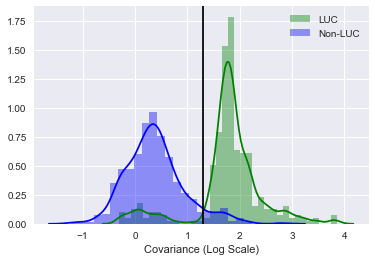

In [8]:
plot(a, b)

In [9]:
fractions(a, b)

(0.10355029585798817, 0.06741573033707865)

/home/gidden/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


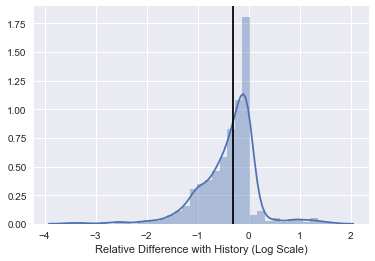

In [10]:
x = df[df['cov'] <= 20]
dh = np.abs(x.offset / x.history)
plotdh(dh)

# All Models

In [11]:
dfs = []
for f in glob.glob('*.xlsx'):
    dfs.append(pd.read_excel(f))
alldf = pd.concat(dfs)

In [12]:
allag = alldf.sector.str.contains('Burning') | alldf.sector.str.contains('Agricult')
c, d = alldf[allag]['cov'], alldf[~allag]['cov']

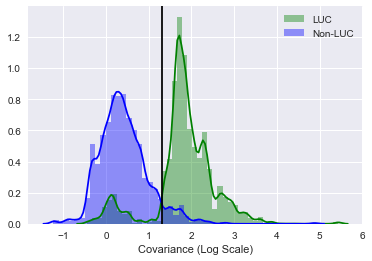

In [13]:
plot(c, d)

In [14]:
fractions(c, d)

(0.10338063920618437, 0.06720011329839966)

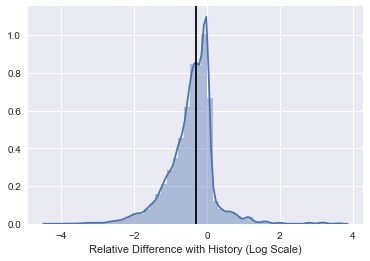

In [15]:
x = alldf[alldf['cov'] <= 20]
dh = np.abs(x.offset / x.history)
plotdh(dh)